# Analysing the $mBasicPH\_storage$ model

## Settings

For working with the model, we first import some packages and the modelclass:

In [1]:
# In case, working directory is not set correctly
#os.chdir('C:\\Users\\mpher\\Documents\\Uni\\Master\\02_Exchange\\01_Academics\\Energy Economics of the Green Transition\\0_Final Project\EnergyEconGroupWork')

In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

c:\Users\mpher\Documents\Uni\Master\02_Exchange\01_Academics\Energy Economics of the Green Transition\EnergyEconGroupWork


In [3]:
%run ./stdPackages.ipynb
from pyDbs import *

os.chdir(os.path.join(d['curr'], 'py'))

from mBasicPH_storage import *
os.chdir(d['curr'])

Next we load the database:

In [4]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables','StorageVariables','TransmissionLines'],
        'maps': ['LoadMaps','GeneratorsMaps','StorageMaps','MarketMaps','hMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}

path_to_data = os.path.join(d['curr'], 'Data', 'mBasicPH_storage_Data.xlsx')

db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

Convert variables to floats:

In [5]:
[db.__setitem__(var,db[var].astype(float).sort_index()) for var in db.getTypes('variable').keys()];

We need to read in heat areas manually:

In [6]:
db['g_H'] = db['id2g_H'].get_level_values('g_H').unique()

In [7]:
db['g_H']

Index(['DK_Central'], dtype='object', name='g_H')

We need to read in electricity areas manually:

In [8]:
db['g_E'] = db['id2g_E'].get_level_values('g_E').unique()

In [9]:
db['g_E']

Index(['DK'], dtype='object', name='g_E')

Collect all areas in one:

In [10]:
db['g'] = db['g_E'].copy()

## Initialze Baseline Model and Debug

In [11]:
m=mSimple(db)
m.db.symbols.keys()

dict_keys(['EmissionIntensity', 'FuelPrice', 'EmissionTax', 'Load_E', 'LoadVariation_E', 'Load_H', 'LoadVariation_H', 'E2H', 'GeneratingCap_H', 'FOM', 'OtherMC', 'FuelMix', 'GeneratingCap_E', 'selfDischarge', 'sCap', 'chargeCap_H', 'effD', 'effC', 'lineMC', 'lineFOM', 'lineCapacity', 'c_E2g_E', 'c_H2g_H', 'id2hvt', 'id2g_E', 'id2g_H', 'id2tech', 'tech2modelTech', 'g_E2g', 'g_H2g', 'g_E2g_H', 'h2HourOfTheDay', 'h2Week', 'h2Month', 'h2Weekday', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'BFt', 'EmissionType', 'c_E', 'h', 'c_H', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech'])

The problem was, that the storage was not correctly mapped to the heating area. Now it is included in the index below. You can check so by searching for *id_DK_Central_HS* and *id_DK_Decentral_HS*.

In [12]:
m.db['id2g_H']

MultiIndex([(        'id_DK_Central_BH_Biogas', 'DK_Central'),
            (       'id_DK_Central_BH_Biomass', 'DK_Central'),
            (        'id_DK_Central_BH_Natgas', 'DK_Central'),
            (           'id_DK_Central_BH_Oil', 'DK_Central'),
            (         'id_DK_Central_BH_Waste', 'DK_Central'),
            (        'id_DK_Central_BP_Biogas', 'DK_Central'),
            (       'id_DK_Central_BP_Biomass', 'DK_Central'),
            (          'id_DK_Central_BP_Coal', 'DK_Central'),
            (        'id_DK_Central_BP_Natgas', 'DK_Central'),
            (           'id_DK_Central_BP_Oil', 'DK_Central'),
            (         'id_DK_Central_BP_Waste', 'DK_Central'),
            (               'id_DK_Central_EP', 'DK_Central'),
            (               'id_DK_Central_GT', 'DK_Central'),
            (       'id_DK_Central_HPstandard', 'DK_Central'),
            (    'id_DK_Central_HPsurplusheat', 'DK_Central'),
            (               'id_DK_Central_HS', 'DK_Cen

## Solve Baseline Model

We then initialize and solve the model:

In [13]:
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


In [14]:
m.db.symbols.keys()

dict_keys(['EmissionIntensity', 'FuelPrice', 'EmissionTax', 'Load_E', 'LoadVariation_E', 'Load_H', 'LoadVariation_H', 'E2H', 'GeneratingCap_H', 'FOM', 'OtherMC', 'FuelMix', 'GeneratingCap_E', 'selfDischarge', 'sCap', 'chargeCap_H', 'effD', 'effC', 'lineMC', 'lineFOM', 'lineCapacity', 'c_E2g_E', 'c_H2g_H', 'id2hvt', 'id2g_E', 'id2g_H', 'id2tech', 'tech2modelTech', 'g_E2g', 'g_H2g', 'g_E2g_H', 'h2HourOfTheDay', 'h2Week', 'h2Month', 'h2Weekday', 'CapVariation', 'MWP_E', 'MWP_H', 'lineLoss', 'BFt', 'EmissionType', 'c_E', 'h', 'c_H', 'id', 'g_E', 'g_E_alias', 'hvt', 'g_H', 'g', 'gConnected', 'id2modelTech2tech', 'mc', 'Transmission_E', 'HourlyDemand_E', 'HourlyDemand_H', 'Generation_E', 'charge_H', 'Generation_H', 'discharge_H', 'stored_H', 'λ_PowerToHeat', 'λ_LawOfMotion_H', 'λ_equilibrium_E', 'λ_equilibrium_H', 'λ_Transmission_E', 'λ_HourlyDemand_E', 'λ_HourlyDemand_H', 'λ_Generation_E', 'λ_charge_H', 'λ_Generation_H', 'λ_discharge_H', 'λ_stored_H', 'Welfare', 'FuelConsumption', 'Emission

Save solution for later:

In [15]:
base_db = m.db.copy()

### Inspect Baseline Solution

In [ ]:
base_db['charge_H']

In [ ]:
base_db['discharge_H']

### Plot Residual Demand

### Plotting:

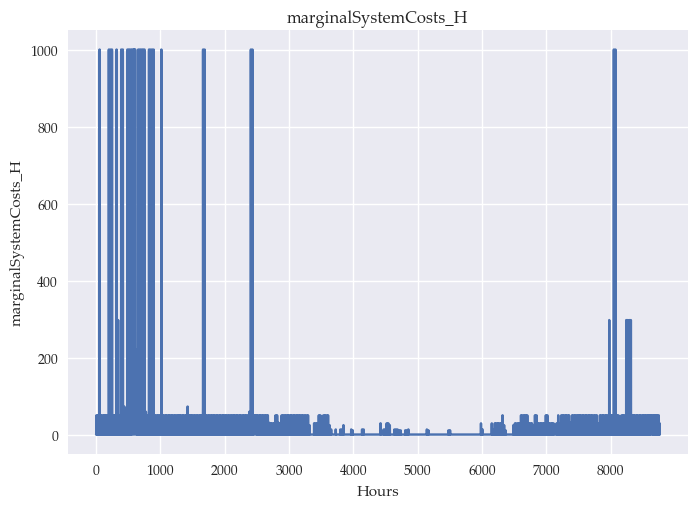

In [21]:
tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
base_db['marginalSystemCosts_H'].plot()
plt.xlabel('Hours')
plt.ylabel('marginalSystemCosts_H')
plt.xticks(tick_positions, tick_positions)
plt.title('marginalSystemCosts_H')
plt.show()

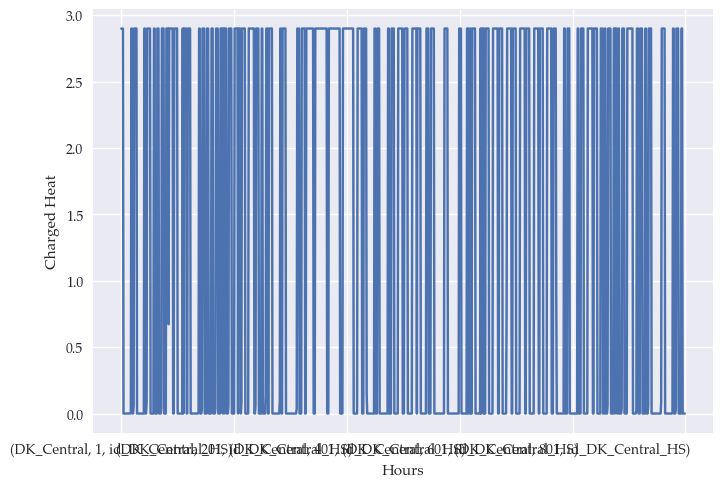

In [18]:
start_hour = 1
end_hour = 1000

# For axis names
tick_positions = range(0, 1000, 100)

# Filter the Series for the specified range of hours
filtered_series_charged_H = base_db['charge_H'][(base_db['charge_H'].index.get_level_values('h') >= start_hour) & (base_db['charge_H'].index.get_level_values('h') <= end_hour)]

# Plot the subset DataFrame
filtered_series_charged_H.plot()
plt.xlabel('Hours')
plt.ylabel('Charged Heat')
#plt.xticks(tick_positions, tick_positions)
plt.show()

Plotting **marginalSystemCosts_H**:

In [ ]:
# For axis names
tick_positions = range(0, 8761, 1000)

# Plot the subset DataFrame
base_db['marginalSystemCosts_H'].plot()
plt.xlabel('Hours')
plt.ylabel('Marginal System Costs')
plt.xticks(tick_positions, tick_positions)
plt.title('Marginal System Costs DK_Central')
plt.show()

<Axes: xlabel='g_H,h,id'>

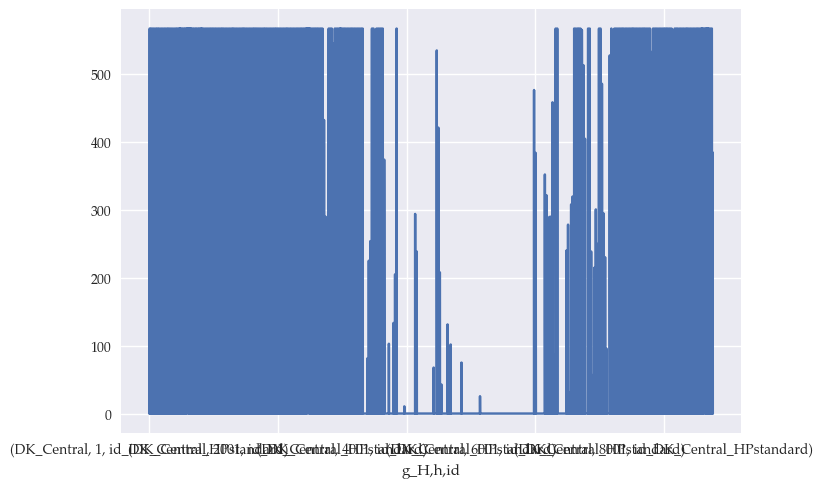

In [19]:
base_db['Generation_H'][(base_db['Generation_H'].index.get_level_values('id') == 'id_DK_Central_HPstandard')].plot()

## Increase Storage Capacity

These are the baseline storage capacities:

In [ ]:
base_db['sCap']

In the following, we will run an experiment where we are exogenously increase the capacity of the storage technology from the baseline levels. We will assume the same storage duration of **60.344828 hours** as in the baseline scenario.

We will also be extracting the following variables:

In [ ]:
extract = ['marginalSystemCosts_E','marginalSystemCosts_H','stored_H','Welfare','Emissions', 'marginalEconomicValue', 'meanConsumerPrice_E', 'meanConsumerPrice_H']

In [ ]:
# Setting
E2H = 60.344828 # The "energy storage to heat"-ratio/storage duration
maxcap = base_db['GeneratingCap_H']*2
loop = pd.Index(range(5), name = 'loop')
v0_GCap = pd.Series(base_db['GeneratingCap_H'], index = getTechs(['HS'],m.db))
vT_GCap = pd.Series(maxcap, index = v0_GCap.index)
v0_SCap = v0_GCap.mul(E2H)
vT_SCap = vT_GCap.mul(E2H)

grid_GCap = adjMultiIndex.addGrid(v0_GCap,vT_GCap,loop,'GeneratingCapacity').astype(int)
grid_SCap = adjMultiIndex.addGrid(v0_SCap,vT_SCap,loop,'sCap').astype(int)

In [ ]:
grid_GCap

In [ ]:
grid_SCap

We now run the counterfactual scenarios:

In [ ]:
solution = m.loopSolveExtract(loop, [grid_GCap, grid_SCap], extract)

In [ ]:
solution['stored_H']

In [ ]:
%%capture
loop_id=loop[[0,1,2,3,4]]

In [ ]:
# Calculate tick positions for every 1000
tick_positions = range(0,  8761, 1000)

# Plot the subset Series
adj.rc_pd(solution['stored_H'],loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()

In [ ]:
start_hour = 1
end_hour = 1000

# Filter the Series for the specified range of hours
filtered_series = solution['stored_H'][(solution['stored_H'].index.get_level_values('h') >= start_hour) & (solution['stored_H'].index.get_level_values('h') <= end_hour)]

# Calculate tick positions for every 1000
tick_positions = range(0,  1000, 100)

# Plot the subset Series
adj.rc_pd(filtered_series,loop_id).unstack('loop').plot()
plt.xlabel('Hours')
plt.ylabel('Stored Heat')
plt.xticks(tick_positions,tick_positions)
plt.title('Counterfactual Scenario DK_Central')
plt.show()

In [ ]:
tick_positions

What to plot?

- CO2 Emissions
- Usage of Storage
- Marginal Economic value of storage
- seasonal storage?